In [42]:
import pandas as pd

# Load data
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display basic info
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.isnull().sum() # check if there is ant empty field.


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #converting the Total charges to numeric value 
df.dropna(inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Drop customerID only if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Binary encoding for Churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Label encode all object columns and save encoders for ML model training
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save all encoders
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

Text(0.5, 1.0, 'Churn Distribution')

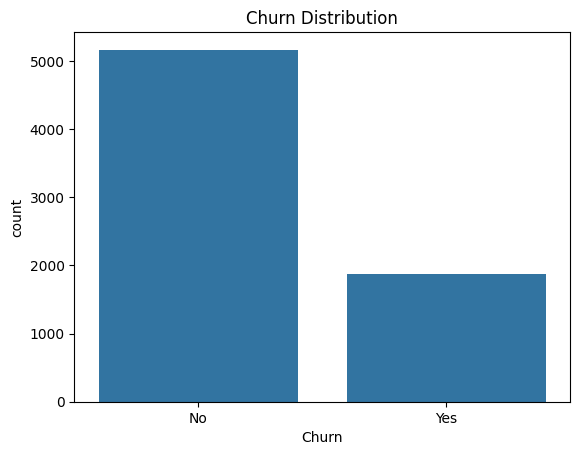

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Churn'] = df['Churn'].map({1: 'Yes', 0: 'No'})

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')


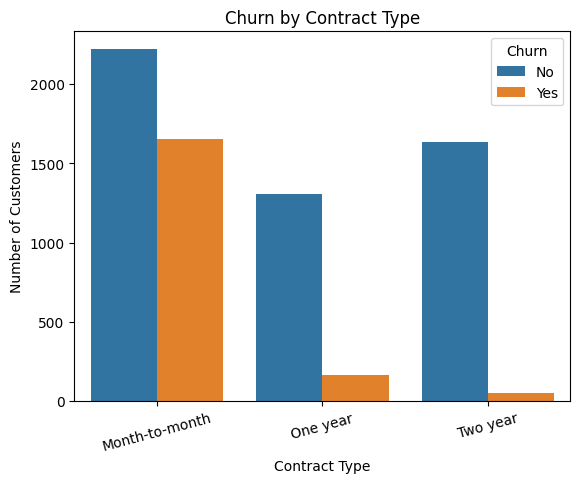

In [47]:
contract_mapping = {
    0: 'Month-to-month',
    1: 'One year',
    2: 'Two year'
}
 
 
df['ContractLabel'] = df['Contract'].map(contract_mapping)

sns.countplot(x='ContractLabel', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Divide the Dataset into Train and test

In [ ]:
# Train Data on XGB classifier 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407

ROC AUC Score: 0.8075668708035886


c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:31:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [49]:
import joblib

# Save the trained XGBoost model
joblib.dump(model, 'xgb_churn_model.pkl')


['xgb_churn_model.pkl']

In [53]:

import shap
import xgboost
import matplotlib.pyplot as plt

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

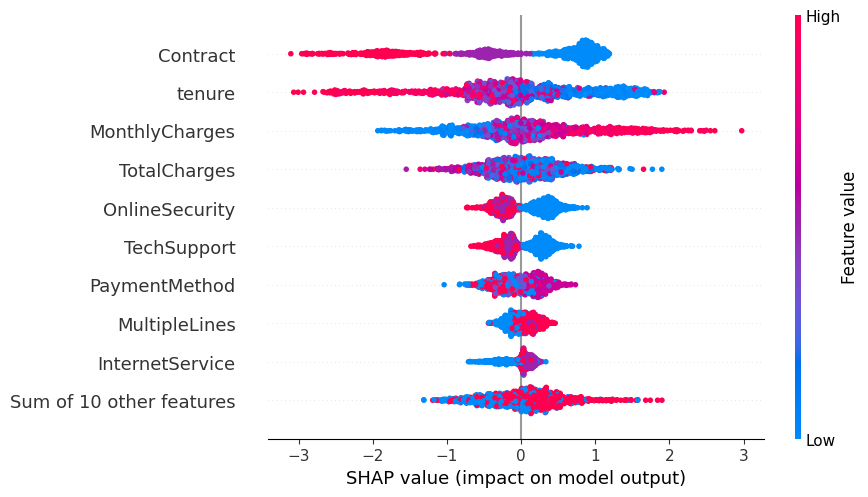

In [54]:
shap.plots.beeswarm(shap_values)

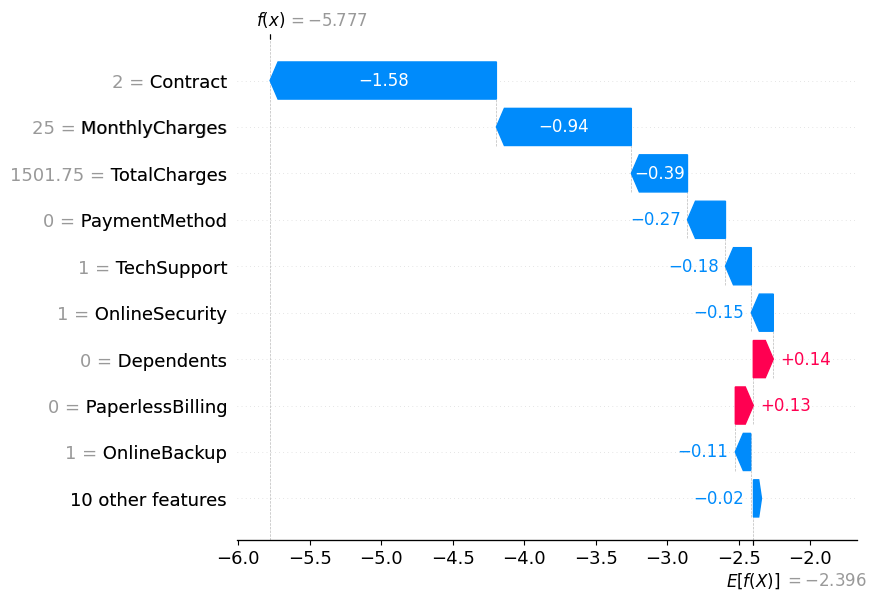

In [55]:
shap.plots.waterfall(shap_values[0])